In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC_template.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 40
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="nonlinear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.30: 
 State beta violation: -0.21 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
Simulating time 0.35: 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.40: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
 State

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=799, step=2), IntSlider(value=0…

In [4]:
final_pos = x_cl[9:12, -1]  # [x, y, z] at last timestep
print(f"Target:   {pos_target}")
print(f"Final:    {final_pos}")
print(f"Error:    {final_pos - pos_target}")

Target:   [ 0.  0. 10.]
Final:    [1.63542149e-03 1.64643590e-03 1.00002490e+01]
Error:    [0.00163542 0.00164644 0.00024899]


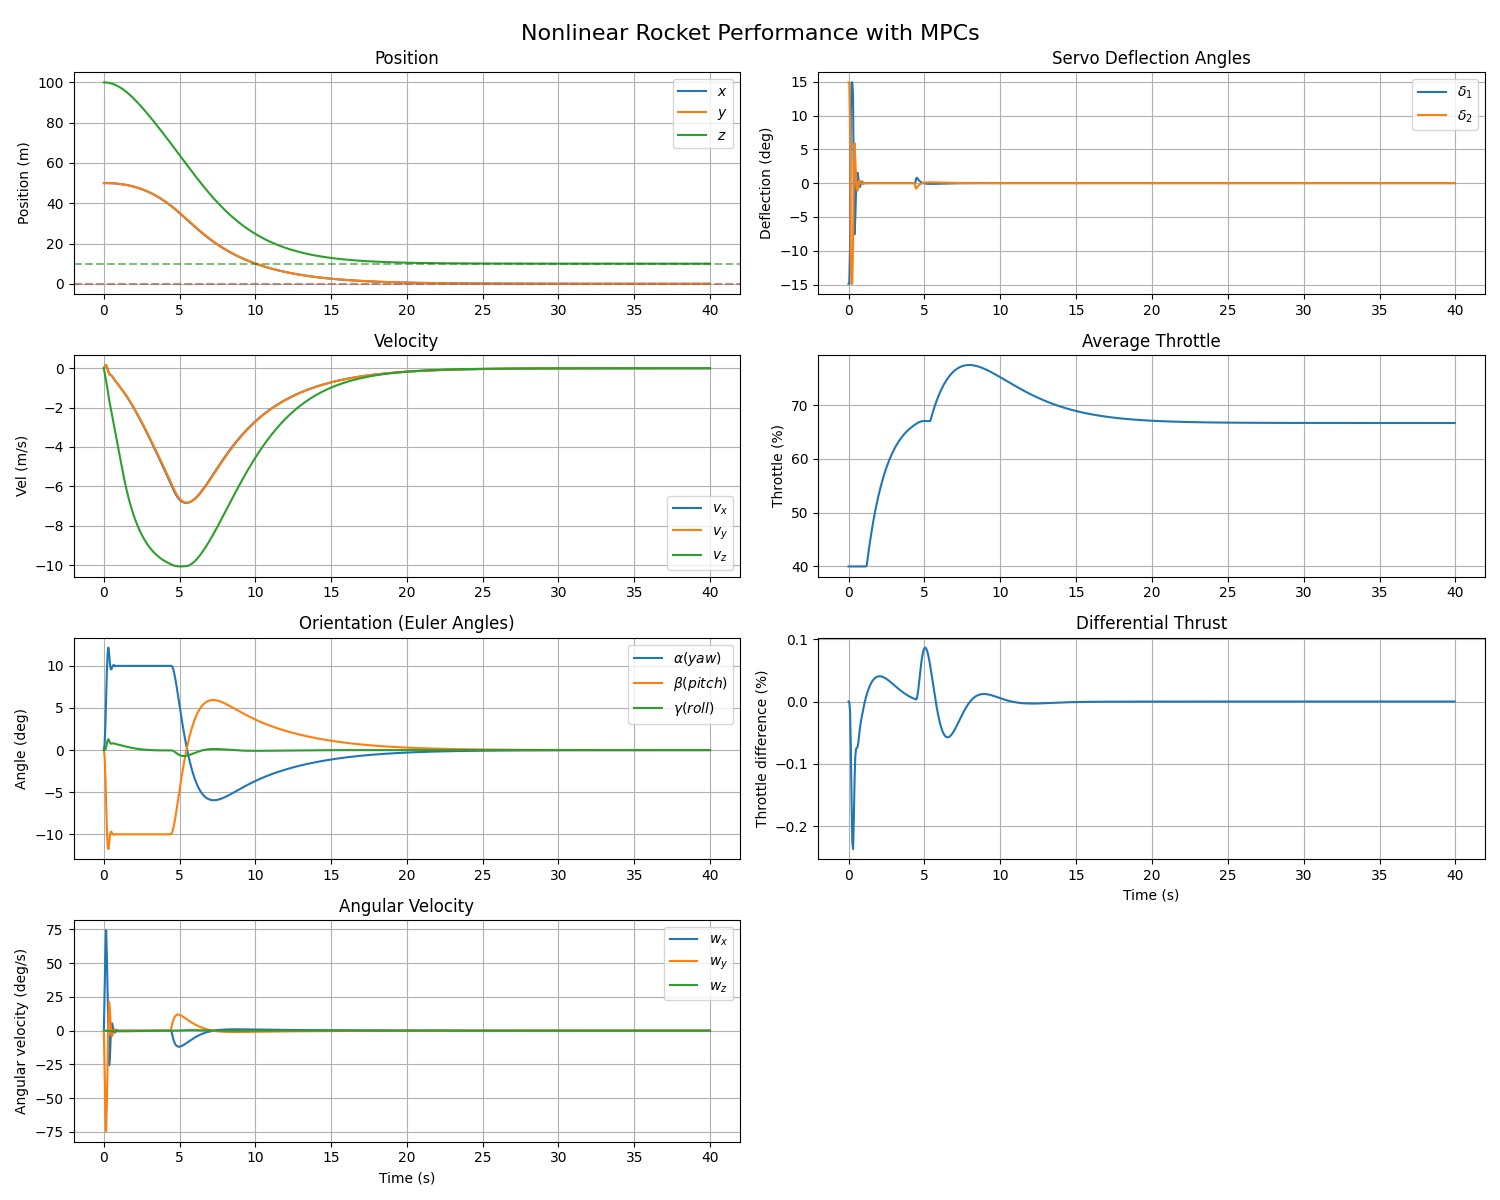

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Plotting states & inputs vs time 
fig, axs = plt.subplots(4, 2, figsize=(15, 12))
fig.suptitle('Nonlinear Rocket Performance with MPCs', fontsize=16)

# Time vector
t = t_cl[:-1] if t_cl.shape[0] > x_cl.shape[1] else t_cl

# Position (x, y, z)
axs[0, 0].plot(t, x_cl[9, :], label=r'$x$')
axs[0, 0].plot(t, x_cl[10, :], label=r'$y$')
axs[0, 0].plot(t, x_cl[11, :], label=r'$z$')
axs[0, 0].axhline(y=pos_target[0], color='b', linestyle='--', alpha=0.5)
axs[0, 0].axhline(y=pos_target[1], color='orange', linestyle='--', alpha=0.5)
axs[0, 0].axhline(y=pos_target[2], color='g', linestyle='--', alpha=0.5)
axs[0, 0].set_title('Position')
axs[0, 0].set_ylabel('Position (m)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Velocity (vx, vy, vz) 
axs[1, 0].plot(t, x_cl[6, :], label=r'$v_x$')
axs[1, 0].plot(t, x_cl[7, :], label=r'$v_y$')
axs[1, 0].plot(t, x_cl[8, :], label=r'$v_z$')
axs[1, 0].set_title('Velocity')
axs[1, 0].set_ylabel('Vel (m/s)')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Orientation (alpha, beta, gamma) 
axs[2, 0].plot(t, np.rad2deg(x_cl[3, :]), label=r'$\alpha (yaw)$')
axs[2, 0].plot(t, np.rad2deg(x_cl[4, :]), label=r'$\beta (pitch)$')
axs[2, 0].plot(t, np.rad2deg(x_cl[5, :]), label=r'$\gamma (roll)$')
axs[2, 0].set_title('Orientation (Euler Angles)')
axs[2, 0].set_ylabel('Angle (deg)')
axs[2, 0].legend()
axs[2, 0].grid(True)

# Angular Velocity (wx, wy, wz) 
axs[3, 0].plot(t, np.rad2deg(x_cl[0, :]), label=r'$w_x$')
axs[3, 0].plot(t, np.rad2deg(x_cl[1, :]), label=r'$w_y$')
axs[3, 0].plot(t, np.rad2deg(x_cl[2, :]), label=r'$w_z$')
axs[3, 0].set_title('Angular Velocity')
axs[3, 0].set_ylabel('Angular velocity (deg/s)')
axs[3, 0].set_xlabel('Time (s)')
axs[3, 0].legend()
axs[3, 0].grid(True)

# Control Inputs: Servo deflection angles (delta1, delta2) 
t_u = t if len(t) == u_cl.shape[1] else t[:-1]

axs[0, 1].plot(t_u, np.rad2deg(u_cl[0, :]), label=r'$\delta_1$')
axs[0, 1].plot(t_u, np.rad2deg(u_cl[1, :]), label=r'$\delta_2$')
axs[0, 1].set_title('Servo Deflection Angles')
axs[0, 1].set_ylabel('Deflection (deg)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Control Inputs: Thrust (P_avg, P_diff)
axs[1, 1].plot(t_u, u_cl[2, :], label=r'$P_{avg} (%)$')
axs[1, 1].set_title('Average Throttle')
axs[1, 1].set_ylabel('Throttle (%)')
axs[1, 1].grid(True)

axs[2, 1].plot(t_u, u_cl[3, :], label=r'$P_{diff} (%)$')
axs[2, 1].set_title('Differential Thrust')
axs[2, 1].set_ylabel('Throttle difference (%)')
axs[2, 1].set_xlabel('Time (s)')
axs[2, 1].grid(True)

axs[3, 1].axis('off')  # Hide unused subplot

plt.tight_layout()
plt.show()